In [3]:
import numpy as np 
from sympy import *
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
from IPython.display import *
init_printing(use_latex=True)
%matplotlib inline

Examples of continuous probability distributions are:

    norm : Normal or Gaussian
    chi2 : Chi-squared
    t : Student’s T
    uniform : Uniform

Examples of discrete probability distributions are:

    binom : Binomial
    poisson : Poisson

Examples of statistical functions:

    mode : Modal value
    moment : central moment
    describe: descriptive statistics
    histogram: histogram of data


# Binomial Distribution

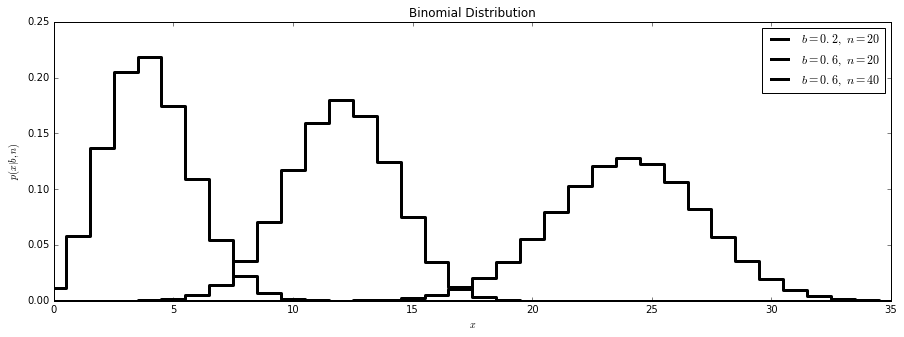

Probability Mass Function of 5 is: 0.174559521557
Comulative Distribution function of 5 is: 0.80420778546


In [43]:
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(0, 40)

fig, ax = plt.subplots(figsize=(15, 5))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    ax.plot(x, dist.pmf(x), ls=ls, c='black', lw = 3,
             label=r'$b=%.1f,\ n=%i$' % (b, n), linestyle='steps-mid')

plt.xlim(0, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')
ax.legend()
plt.show()

dist = binom(n_values[0], b_values[0])

# Probability Mass Function 
print 'Probability Mass Function of 5 is: {v}'.format(v = dist.pmf(5))
# Comulative Distribution Function
print 'Comulative Distribution function of 5 is: {v}'.format(v = dist.cdf(5))

# Normal Distribution

<IPython.core.display.Latex object>

Probability Density Function of 0.4 is: 0.579383105523
Comulative Distribution function of 0.4 is: 0.788144601417


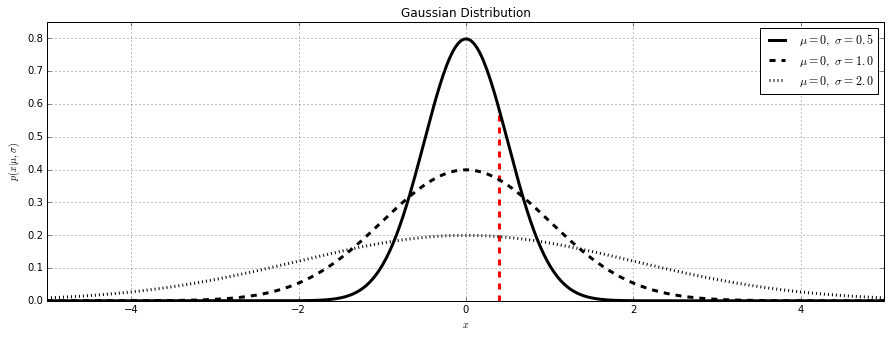

In [128]:
ltx = '$ pdf(x,\\mu,\\sigma) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)}$'

display(Latex(ltx))

# Comulative Distribution Function
mu =0
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
x = np.linspace(-10, 10,1000)

fig, ax = plt.subplots(figsize=(15, 5))

for (sigma, ls) in zip(sigma_values, linestyles):
    # create a binomial distribution
    dist = norm(mu, sigma)

    ax.plot(x, dist.pdf(x), ls=ls, c='black',lw=3,
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))


plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.grid(True)
ax.legend()

dist = norm(mu, sigma_values[0])
# Probability Density Function.
print 'Probability Density Function of 0.4 is: {v}'.format(v = dist.pdf(0.4))
ax.vlines(0.4,0,dist.pdf(0.4),colors='r', linestyles='--', lw=3)
# Comulative Distribution Function
print 'Comulative Distribution function of 0.4 is: {v}'.format(v = dist.cdf(0.4))

plt.show()

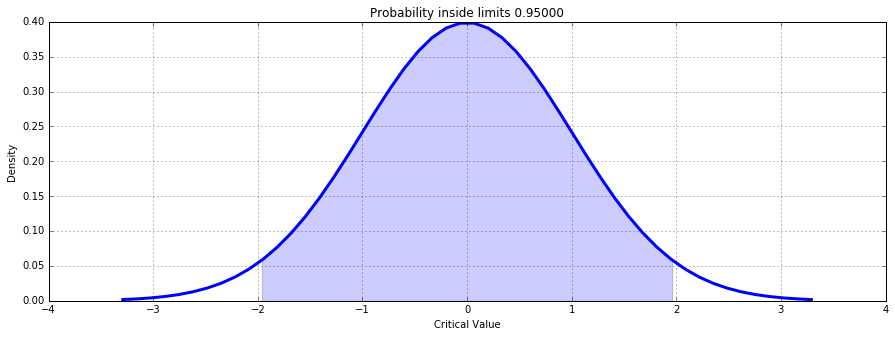

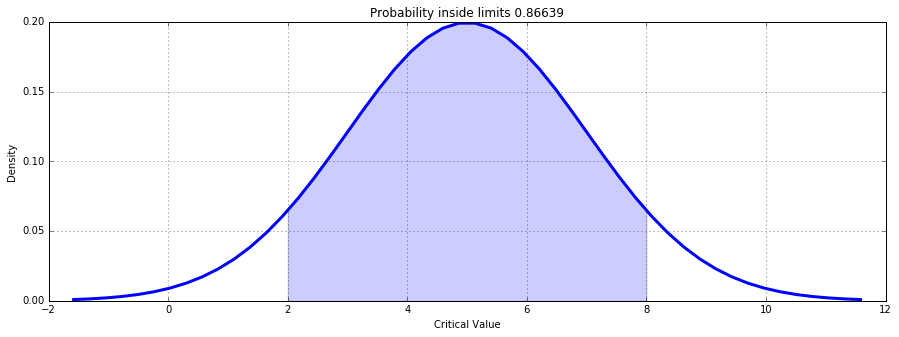

In [167]:
def normspec(interval = [-1,1], mu=0,sigma = 1,region = 'inside'):
    
    dist = norm(mu,sigma)
    x_min, x_max = dist.interval(0.999)
    x = np.linspace(x_min,x_max)
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(x,dist.pdf(x),ls = '-', color = 'b', lw = 3)
    p0 = dist.cdf(interval[0])
    p1 = dist.cdf(interval[1])
    
    if region == 'inside':
        interval_min,interval_max = interval[0], interval[1]
        interval_x = np.linspace(interval_min,interval_max)
        ax.fill_between(interval_x,dist.pdf(interval_x),alpha = 0.2)
        probability =  abs(p1 - p0)
    
    elif region == 'outside':
        interval_min1,interval_max1 = interval[1],x_max
        interval_min2,interval_max2 = x_min, interval[0]
        interval_x1 = np.linspace(interval_min1,interval_max1)
        interval_x2 = np.linspace(interval_min2,interval_max2)
        ax.fill_between(interval_x1,dist.pdf(interval_x1),alpha = 0.2)
        ax.fill_between(interval_x2,dist.pdf(interval_x2),alpha = 0.2)
        probability =  1- abs(p1 - p0)
        
    
    plt.xlabel('Critical Value')
    plt.ylabel('Density')
    plt.title('Probability %s limits %2.5f' %(region,probability))
    plt.grid(True)
    plt.show()
normspec(interval = [-1.96,1.96], mu=0,sigma = 1);
normspec(interval = [2,8], mu=5,sigma = 2,region= 'inside');

# Hypergeometric Distribution


    N: The number of items in the population.
    k: The number of items in the population that are classified as successes.
    n: The number of items in the sample.
    x: The number of items in the sample that are classified as successes.
    kCx: The number of combinations of k things, taken x at a time.
    h(x; N, n, k): hypergeometric probability - the probability that an n-trial hypergeometric experiment results in exactly x successes, when the population consists of N items, k of which are classified as successes.


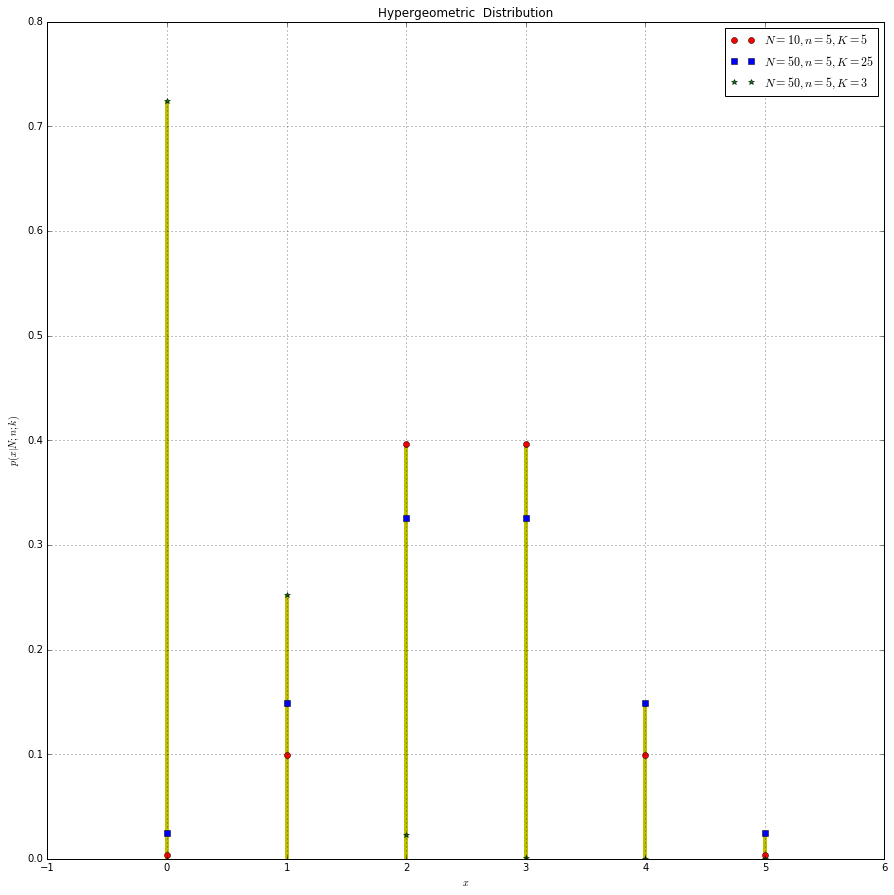

Probability Mass Function of 3 is: 0.396825396825
Comulative Distribution function of 3 is: 0.896825396825


In [89]:
N_values = [10, 50, 50]
n_values = [5, 5, 5]
K_values = [5, 25, 3]

linestyles = ['o', 's', '*']
color = ['r','b','g']

fig, ax =  plt.subplots(figsize=(15, 15))

for (N, n, K,ls,c) in zip(N_values, n_values, K_values,linestyles,color):
    # create a binomial distribution
    dist = hypergeom(N, n, K)
    x = np.arange(0, n+1)
    ax.plot(x, dist.pmf(x), c+ls,label = r'$N=%2i,  n=%2i,  K=%2i$' % (N, n,K))
    ax.vlines(x,0 ,dist.pmf(x),lw = 4,color = 'y')


plt.xlim(-1, 6)
plt.ylim(0, 0.8)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|N;n;k)$')
plt.title('Hypergeometric  Distribution')

ax.legend()
plt.show()

dist = hypergeom(N_values[0], n_values[0],K_values[0])
# Probability Mass Function
print 'Probability Mass Function of 3 is: {v}'.format(v = dist.pmf(3))

# Comulative Distribution Function
print 'Comulative Distribution function of 3 is: {v}'.format(v = dist.cdf(3))

# Random Sampling

In [128]:
# Mean
X = [1, 2, 3, 4, 5, 6, 8, 9, 10];
f_x=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1];
expectedValue = 0;
for idx in range(len(X)):
    expectedValue += X[idx] * f_x[idx]

print 'Mean of X vector is: {v}'.format(v = expectedValue)
# Standard Deviation
Var = 0;
for idx in range(len(X)):
    Var += ((X[idx]-expectedValue)**2) * f_x[idx]

SDe=sqrt(Var);
print 'Standard Deviation of X vector is: {v}'.format(v = SDe)

Mean of X vector is: 4.8
Standard Deviation of X vector is: 2.87332559937088
